Trying to determine where to impose a $M_{halo}$ cut based on either $M_{halo}$ or $M_{max}$ cuts

In [10]:
import numpy as np
# --- centralms --- 
from centralMS import util as UT
from centralMS import catalog as Cat

In [11]:
import corner as DFM
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [12]:
subhalo = Cat.CentralSubhalos(nsnap0=15)
shcat = subhalo.Read()

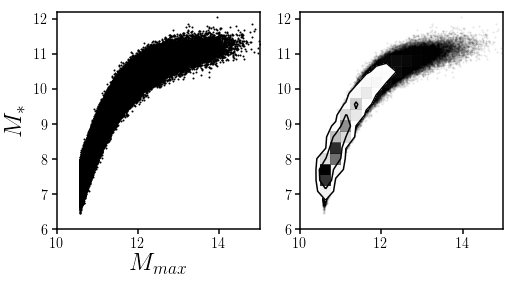

In [18]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(shcat['m.max'], shcat['m.star'], c='k', s=1)
sub.set_xlabel('$M_{max}$', fontsize=25)
sub.set_xlim([10., 15.])
sub.set_ylabel('$M_*$', fontsize=25)
sub.set_ylim([6., 12.2])
sub = fig.add_subplot(122)
DFM.hist2d(shcat['m.max'], shcat['m.star'], 
           levels=[0.68, 0.95], range=[[10., 15.],[6., 12.2]], 
           ax=sub)

In [23]:
print shcat['m.max'][shcat['m.star'] == 0.].min(), shcat['m.max'][shcat['m.star'] == 0.].max()

10.044011 10.569982


In [24]:
print shcat['m.max'][shcat['m.star'] != 0.].min()

10.569982


(8.0, 15.0)

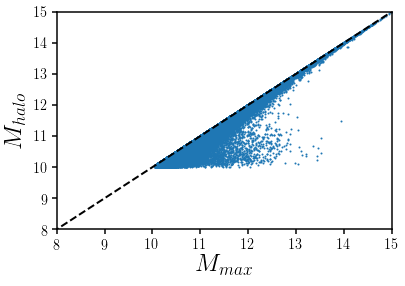

In [14]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(shcat['m.max'], shcat['halo.m'], c='C0', s=1)
sub.plot([0., 15.], [0., 15.], c='k', lw=2, ls='--')
sub.set_xlabel('$M_{max}$', fontsize=25)
sub.set_xlim([8., 15.])
sub.set_ylabel('$M_{halo}$', fontsize=25)
sub.set_ylim([8., 15.])

(0.0, 12.0)

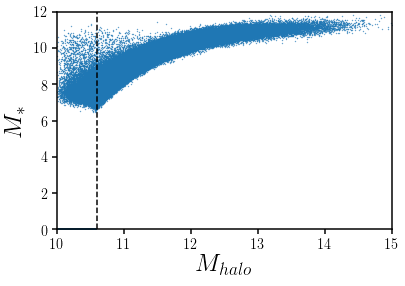

In [29]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(shcat['halo.m'], shcat['m.star'], c='C0', s=0.1)
sub.vlines(10.6, 0., 12., color='k', linestyle='--')
sub.set_xlabel('$M_{halo}$', fontsize=25)
sub.set_xlim([10., 15.])
sub.set_ylabel('$M_*$', fontsize=25)
sub.set_ylim([0., 12.])

Text(0,0.5,'$M_*$')

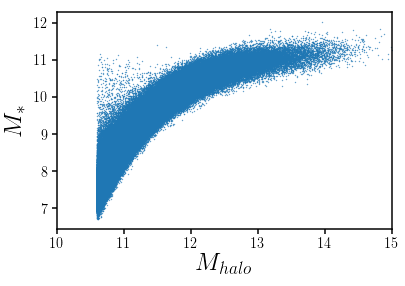

In [30]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(shcat['halo.m'][shcat['halo.m'] > 10.6], shcat['m.star'][shcat['halo.m'] > 10.6], c='C0', s=0.1)
sub.set_xlabel('$M_{halo}$', fontsize=25)
sub.set_xlim([10., 15.])
sub.set_ylabel('$M_*$', fontsize=25)

Text(0,0.5,'$M_*$')

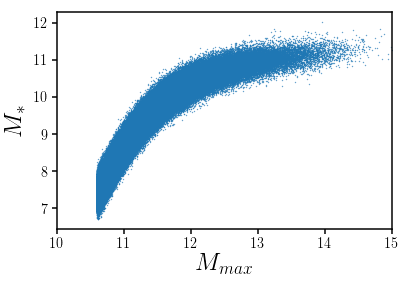

In [31]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(shcat['m.max'][shcat['halo.m'] > 10.6], shcat['m.star'][shcat['halo.m'] > 10.6], c='C0', s=0.1)
sub.set_xlabel('$M_{max}$', fontsize=25)
sub.set_xlim([10., 15.])
sub.set_ylabel('$M_*$', fontsize=25)

In [16]:
mh_bins = np.linspace(10., 15., 20)
ms_med = [] 
ms_sig = []
for i_m in range(len(mh_bins)-1): 
    inmhbin = ((shcat['halo.m'] >= mh_bins[i_m]) & (shcat['halo.m'] < mh_bins[i_m+1]))
    ms_med.append(np.median(shcat['m.star'][inmhbin]))
    ms_sig.append(np.std(shcat['m.star'][inmhbin]))

Text(0,0.5,'$M_*$')

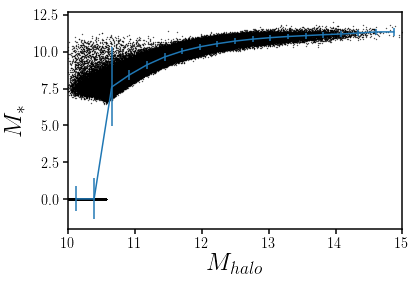

In [21]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(shcat['halo.m'], shcat['m.star'], c='k', s=0.1)
sub.errorbar(0.5*(mh_bins[:-1] + mh_bins[1:]), ms_med, ms_sig)
sub.set_xlabel('$M_{halo}$', fontsize=25)
sub.set_xlim([10., 15.])
sub.set_ylabel('$M_*$', fontsize=25)
